# BioRemPP: Technical Demonstration of Python API


## Comprehensive Analysis Framework for Bioremediation Potential Assessment via Programmatic Interface

---

### Introduction

The **Bioremediation Potential Profile (BioRemPP)** provides not only a command-line interface but also a comprehensive **Python API** for programmatic integration into bioinformatics workflows, Jupyter notebooks, and automated analysis pipelines. This notebook demonstrates the complete functionality available through the Python API, showcasing the same analytical capabilities as the CLI but with enhanced flexibility for data manipulation and custom workflows.

### Scientific Context

Environmental contamination analysis through bioremediation potential assessment requires computational tools that can be seamlessly integrated into existing research pipelines. The BioRemPP Python API addresses this need by providing direct programmatic access to:

1. **Database Integration**: Direct access to BioRemPP core database, KEGG, HADEG, and ToxCSM databases
2. **Pipeline Processing**: Standardized analytical workflows with customizable parameters
3. **Data Structure Access**: Direct manipulation of results as pandas DataFrames
4. **Error Handling**: Comprehensive exception handling for robust applications


### API Architecture Overview

The BioRemPP Python API follows clean architecture principles with:
- **Pipeline Functions**: High-level processing functions for each database
- **Modular Design**: Separated concerns for input processing, analysis, and output
- **Type Safety**: Comprehensive type hints for enhanced development experience
- **Configuration Options**: Flexible parameter configuration for advanced use cases

This demonstration follows the same analytical workflow as the CLI demonstration but showcases the enhanced capabilities available through programmatic access.

## Citation

When using the BioRemPP API in academic research, please cite:

```
BioRemPP: Bioremediation Potential Profile — a computational framework
for bioremediation analysis. Version {biorempp.__version__}
```



---

## 1. Installation and Environment Setup

### 1.1 Package Installation

BioRemPP can be installed through standard Python package management. For this demonstration, we ensure the latest version is available and properly configured.

In [ ]:
# Install BioRemPP from PyPI
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ biorempp==0.7.0.post1.dev2

# Install additional required packages for data analysis
!pip install pandas matplotlib seaborn requests

### 1.2 Import Required Libraries

We import the necessary libraries for data analysis, visualization, and BioRemPP API access.

In [7]:
# Core data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import requests
import json
from typing import Dict, Any, Optional
import warnings
warnings.filterwarnings('ignore')



# Verification imports
import biorempp
from biorempp.app.application import BioRemPPApplication

print(f"✅ BioRemPP version: {biorempp.__version__}")
print(f"✅ Installation path: {biorempp.__file__}")
print("✅ All required libraries imported successfully")

✅ BioRemPP version: 0.7.0.post1.dev2
✅ Installation path: /usr/local/lib/python3.11/dist-packages/biorempp/__init__.py
✅ All required libraries imported successfully


In [5]:
# Imports principais do BioRemPP
from biorempp.pipelines import (
    run_biorempp_processing_pipeline,
    run_kegg_processing_pipeline,
    run_hadeg_processing_pipeline,
    run_toxcsm_processing_pipeline
)

# Imports para funcionalidades complementares
from biorempp.input_processing import (
    validate_and_process_input,
    merge_input_with_biorempp,
    merge_input_with_kegg,
    merge_input_with_hadeg,
    merge_input_with_toxcsm
)

# Bibliotecas para análise e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

print("✅ Imports realizados com sucesso!")
print(f"📦 BioRemPP - Demonstração via API Python")
print(f"🔬 Versão do pandas: {pd.__version__}")
print(f"📊 Versão do matplotlib: {plt.matplotlib.__version__}")
print(f"📈 Versão do seaborn: {sns.__version__}")

✅ Imports realizados com sucesso!
📦 BioRemPP - Demonstração via API Python
🔬 Versão do pandas: 2.2.2
📊 Versão do matplotlib: 3.10.0
📈 Versão do seaborn: 0.13.2


### 1.3 API Configuration and Setup

Unlike CLI usage, the Python API allows for direct configuration of processing parameters and enhanced error handling.

In [18]:
# Configure processing parameters
PROCESSING_CONFIG = {
    'output_dir': Path('api_results'),
    'optimize_types': True,
    'add_timestamp': False,
    'custom_headers': True,
    'validate_input': True
}

# Create output directory
PROCESSING_CONFIG['output_dir'].mkdir(exist_ok=True)

# Display configuration
print("🔧 API Processing Configuration:")
for key, value in PROCESSING_CONFIG.items():
    print(f"   {key}: {value}")

print("\n✅ API environment configured successfully")

🔧 API Processing Configuration:
   output_dir: api_results
   optimize_types: True
   add_timestamp: False
   custom_headers: True
   validate_input: True

✅ API environment configured successfully


---

## 2. Database Information and Discovery via API

### 2.1 Programmatic Database Enumeration

The Python API provides direct access to database information through the application interface, enabling programmatic discovery and metadata analysis.

In [9]:
# Initialize BioRemPP application for database information
app = BioRemPPApplication()

# Programmatically retrieve database list
# This simulates the --list-databases functionality
try:
    # Run the list databases command programmatically
    result = app.run(['--list-databases'])
    print("📊 Database enumeration completed via API")
    print("   Available databases retrieved programmatically")

    # Additional programmatic access to database metadata
    print("\n🔍 Programmatic Database Analysis:")
    print("   - Database information accessible via API")
    print("   - Metadata available for processing pipelines")
    print("   - Configuration parameters retrievable")

except Exception as e:
    print(f"⚠️ Error accessing database information: {e}")


[DATABASES] Available Databases:

[DB] BIOREMPP
   Name: BioRemPP Core Database
   Description: Bioremediation Potential Profile Database (6,623 records)
   File: database_biorempp.csv (0.69 MB)

[DB] HADEG
   Name: HADEG Database
   Description: Hydrocarbon Aerobic Degradation Enzymes and Genes (1,168 records)
   File: database_hadeg.csv (0.04 MB)

[DB] KEGG
   Name: KEGG Pathways
   Description: 20 KEGG for xenobiotic biodegradation pathways (871 records)
   File: kegg_degradation_pathways.csv (0.02 MB)

[DB] TOXCSM
   Name: ToxCSM Database
   Description: Comprehensive Prediction of Small Molecule Toxicity Profiles (323 records, 66 endpoints)
   File: database_toxcsm.csv (0.18 MB)

[SAMPLE] Example Input Data:
   File: sample_data.txt (0.18 MB)
   Content: 10 organisms with 23,663 KO identifiers
   Format: Organism headers (>) and KO entries

[USAGE] Usage Examples:
   biorempp --input sample_data.txt --all-databases
   biorempp --input sample_data.txt --database biorempp
   biorem

### 2.2 Direct Database Information Access

The API provides enhanced access to database metadata through direct function calls and structured data access.

In [10]:
# Programmatic database information retrieval
databases = ['biorempp', 'kegg', 'hadeg', 'toxcsm']
database_info = {}

print("📋 Database Information via API:")
print("=" * 50)

for db in databases:
    try:
        # Simulate database info retrieval
        info_result = app.run(['--database-info', db])
        database_info[db] = {
            'name': db.upper(),
            'status': 'accessible',
            'api_ready': True
        }
        print(f"✅ {db.upper()}: Database accessible via API")

    except Exception as e:
        database_info[db] = {
            'name': db.upper(),
            'status': 'error',
            'error': str(e)
        }
        print(f"❌ {db.upper()}: {e}")

print(f"\n📊 Summary: {len([db for db in database_info.values() if db['status'] == 'accessible'])}/{len(databases)} databases accessible")

📋 Database Information via API:

 BioRemPP Core Database
 Description: Bioremediation Potential Profile
 Size: 6,623 records (0.69 MB)
[FORMAT] Format: CSV with semicolon separator

🔍 Database Schema:
    1. ko
    2. genesymbol
    3. genename
    4. cpd
    5. compoundclass
    6. referenceAG
    7. compoundname
    8. enzyme_activity

⭐ Key Features:
   • 986 unique KEGG Orthology (KO) identifiers
   • 323 unique compounds across 12 chemical classes
   • 978 unique enzyme gene symbols
   • 150 different enzyme activities

🎯 Primary Usage:
   Primary database for bioremediation analysis

[USAGE] Usage Examples:
   biorempp --input sample_data.txt --database biorempp
   biorempp --input sample_data.txt --all-databases
   biorempp --list-databases

✅ BIOREMPP: Database accessible via API

 KEGG Degradation Pathways
 Description: KEGG-derived biodegradation pathway information
 Size: 871 records (0.02 MB)
[FORMAT] Format: CSV with semicolon separator

🔍 Database Schema:
    1. ko
    2.

---

## 3. Sample Data Preparation for API Processing

### 3.1 Data Acquisition and API Input Preparation

The Python API allows for flexible data input methods, including direct string input, file paths, and programmatic data generation.

In [19]:
# Method 1: Download sample data programmatically
url = "https://raw.githubusercontent.com/DougFelipe/biorempp/main/src/biorempp/data/sample_data.txt"

try:
    response = requests.get(url, timeout=30)
    response.raise_for_status()

    # Save sample data for API processing
    sample_data_path = PROCESSING_CONFIG['output_dir'] / "sample_data.txt"
    sample_data_path.write_text(response.text, encoding="utf-8")

    print("✅ Sample data downloaded successfully")
    print(f"📁 Saved to: {sample_data_path}")

    # Display sample content for verification
    lines = response.text.splitlines()
    print(f"\n📊 Sample data preview ({len(lines)} total lines):")
    for i, line in enumerate(lines[:10]):
        print(f"   {i+1:2d}: {line}")
    if len(lines) > 10:
        print(f"   ... and {len(lines)-10} more lines")

except Exception as e:
    print(f"❌ Error downloading sample data: {e}")
    # Fallback: create minimal sample data
    sample_data = """>Sample_API_Demo
K00001
K00002
K00003
K00031
K00032
>Sample_API_Test
K00090
K00042
K00052"""

    sample_data_path = PROCESSING_CONFIG['output_dir'] / "sample_data.txt"
    sample_data_path.write_text(sample_data, encoding="utf-8")
    print("✅ Fallback sample data created")

✅ Sample data downloaded successfully
📁 Saved to: api_results/sample_data.txt

📊 Sample data preview (23653 total lines):
    1: >Acinetobacter Baumanii - acb
    2: K01704
    3: K10773
    4: K14682
    5: K07462
    6: K03643
    7: K00799
    8: K03799
    9: K00766
   10: K00564
   ... and 23643 more lines


### 3.2 Input Data Analysis and Validation

The API provides enhanced capabilities for data validation and preprocessing before analysis.

In [12]:
# Analyze input data structure programmatically
def analyze_input_data(file_path: Path) -> Dict[str, Any]:
    """Analyze input data structure for API processing."""
    try:
        content = file_path.read_text(encoding='utf-8')
        lines = content.strip().split('\n')

        # Count samples and KO identifiers
        samples = [line for line in lines if line.startswith('>')]
        ko_lines = [line for line in lines if not line.startswith('>') and line.strip()]

        # Extract KO identifiers
        ko_identifiers = []
        for line in ko_lines:
            if line.strip().startswith('K'):
                ko_identifiers.append(line.strip())

        analysis = {
            'total_lines': len(lines),
            'sample_count': len(samples),
            'ko_count': len(ko_identifiers),
            'unique_ko_count': len(set(ko_identifiers)),
            'sample_names': [s[1:] for s in samples],  # Remove '>' prefix
            'file_size_bytes': file_path.stat().st_size,
            'validation_status': 'valid' if samples and ko_identifiers else 'invalid'
        }

        return analysis

    except Exception as e:
        return {'error': str(e), 'validation_status': 'error'}

# Perform input analysis
input_analysis = analyze_input_data(sample_data_path)

print("🔍 Input Data Analysis:")
print("=" * 40)
if 'error' not in input_analysis:
    for key, value in input_analysis.items():
        if key == 'sample_names':
            print(f"   {key}: {', '.join(value[:3])}{'...' if len(value) > 3 else ''}")
        else:
            print(f"   {key}: {value}")
else:
    print(f"❌ Analysis error: {input_analysis['error']}")

print(f"\n✅ Input validation: {input_analysis.get('validation_status', 'unknown')}")

🔍 Input Data Analysis:
   total_lines: 23653
   sample_count: 9
   ko_count: 23644
   unique_ko_count: 7702
   sample_names: Acinetobacter Baumanii - acb, Aspergillus nidulans - ani, Chlorella variabilis - cvr...
   file_size_bytes: 165758
   validation_status: valid

✅ Input validation: valid


---

## 4. Single Database Analysis via Python API

### 4.1 BioRemPP Core Database API Processing

The Python API provides direct access to processing pipelines with enhanced configurability and result handling.

In [20]:
# BioRemPP Core Database Analysis via API
print("🧬 BioRemPP Core Database Analysis")
print("=" * 50)

try:
    # Execute BioRemPP processing pipeline
    biorempp_result = run_biorempp_processing_pipeline(
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        output_filename="BioRemPP_API_Results.txt",
        sep=";",
        add_timestamp=PROCESSING_CONFIG['add_timestamp'],
        optimize_types=PROCESSING_CONFIG['optimize_types']
    )

    print("✅ BioRemPP processing completed successfully")
    print(f"📊 Processing Results:")
    for key, value in biorempp_result.items():
        if key == 'processing_time':
            print(f"   {key}: {value:.3f} seconds")
        elif key == 'file_size_mb':
            print(f"   {key}: {value:.2f} MB")
        else:
            print(f"   {key}: {value}")

    # Load and analyze results
    if 'output_path' in biorempp_result:
        biorempp_df = pd.read_csv(biorempp_result['output_path'], sep=';')
        print(f"\n📈 Results DataFrame Shape: {biorempp_df.shape}")
        print(f"📈 Columns: {list(biorempp_df.columns)}")

        # Display sample results
        if not biorempp_df.empty:
            print("\n📋 Sample Results (first 3 rows):")
            print(biorempp_df.head(3).to_string(index=False))

except Exception as e:
    print(f"❌ Error in BioRemPP processing: {e}")
    biorempp_result = None

🧬 BioRemPP Core Database Analysis
✅ BioRemPP processing completed successfully
📊 Processing Results:
   output_path: /content/api_results/BioRemPP_API_Results.txt
   matches: 7613
   filename: BioRemPP_API_Results.txt

📈 Results DataFrame Shape: (7613, 9)
📈 Columns: ['sample', 'ko', 'genesymbol', 'genename', 'cpd', 'compoundclass', 'referenceAG', 'compoundname', 'enzyme_activity']

📋 Sample Results (first 3 rows):
                      sample     ko genesymbol                   genename    cpd compoundclass referenceAG    compoundname enzyme_activity
Acinetobacter Baumanii - acb K00799        GST glutathione S-transferase  C10928   Chlorinated         WFD        Alachlor     transferase
Acinetobacter Baumanii - acb K00799        GST glutathione S-transferase  C14322   Chlorinated         WFD    Chlorpyrifos     transferase
Acinetobacter Baumanii - acb K00799        GST glutathione S-transferase  C06790   Chlorinated      CONAMA Trichloroethene     transferase


### 4.2 KEGG Database API Processing

KEGG database analysis through the API provides enhanced pathway analysis capabilities with direct DataFrame access.

In [21]:
# KEGG Database Analysis via API
print("🔬 KEGG Database Analysis")
print("=" * 50)

try:
    # Execute KEGG processing pipeline
    kegg_result = run_kegg_processing_pipeline(
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        output_filename="KEGG_API_Results.txt",
        sep=";",
        add_timestamp=PROCESSING_CONFIG['add_timestamp'],
        optimize_types=PROCESSING_CONFIG['optimize_types']
    )

    print("✅ KEGG processing completed successfully")
    print(f"📊 Processing Results:")
    for key, value in kegg_result.items():
        if key == 'processing_time':
            print(f"   {key}: {value:.3f} seconds")
        elif key == 'file_size_mb':
            print(f"   {key}: {value:.2f} MB")
        else:
            print(f"   {key}: {value}")

    # Load and analyze results
    if 'output_path' in kegg_result:
        kegg_df = pd.read_csv(kegg_result['output_path'], sep=';')
        print(f"\n📈 Results DataFrame Shape: {kegg_df.shape}")

        # Pathway analysis
        if not kegg_df.empty and 'pathway' in kegg_df.columns:
            unique_pathways = kegg_df['pathway'].nunique()
            print(f"📈 Unique pathways identified: {unique_pathways}")

except Exception as e:
    print(f"❌ Error in KEGG processing: {e}")
    kegg_result = None

🔬 KEGG Database Analysis
✅ KEGG processing completed successfully
📊 Processing Results:
   output_path: /content/api_results/KEGG_API_Results.txt
   matches: 731
   filename: KEGG_API_Results.txt

📈 Results DataFrame Shape: (731, 4)


### 4.3 HADEG Database API Processing

HADEG database analysis focusing on hydrocarbon degradation capabilities through programmatic access.

In [22]:
# HADEG Database Analysis via API
print("⚗️ HADEG Database Analysis")
print("=" * 50)

try:
    # Execute HADEG processing pipeline
    hadeg_result = run_hadeg_processing_pipeline(
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        output_filename="HADEG_API_Results.txt",
        sep=";",
        add_timestamp=PROCESSING_CONFIG['add_timestamp'],
        optimize_types=PROCESSING_CONFIG['optimize_types']
    )

    print("✅ HADEG processing completed successfully")
    print(f"📊 Processing Results:")
    for key, value in hadeg_result.items():
        if key == 'processing_time':
            print(f"   {key}: {value:.3f} seconds")
        elif key == 'file_size_mb':
            print(f"   {key}: {value:.2f} MB")
        else:
            print(f"   {key}: {value}")

    # Load and analyze results for hydrocarbon degradation patterns
    if 'output_path' in hadeg_result:
        hadeg_df = pd.read_csv(hadeg_result['output_path'], sep=';')
        print(f"\n📈 Results DataFrame Shape: {hadeg_df.shape}")

        # Analyze degradation capabilities
        if not hadeg_df.empty:
            print("📈 Hydrocarbon degradation analysis available")

except Exception as e:
    print(f"❌ Error in HADEG processing: {e}")
    hadeg_result = None

⚗️ HADEG Database Analysis
✅ HADEG processing completed successfully
📊 Processing Results:
   output_path: /content/api_results/HADEG_API_Results.txt
   matches: 1737
   filename: HADEG_API_Results.txt

📈 Results DataFrame Shape: (1737, 5)
📈 Hydrocarbon degradation analysis available


### 4.4 ToxCSM Database API Processing

ToxCSM analysis for toxicity prediction through the Python API with enhanced safety assessment capabilities.

In [23]:
# ToxCSM Database Analysis via API
print("🧪 ToxCSM Database Analysis")
print("=" * 50)

try:
    # Execute ToxCSM processing pipeline
    toxcsm_result = run_toxcsm_processing_pipeline(
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        output_filename="ToxCSM_API_Results.txt",
        sep=";",
        add_timestamp=PROCESSING_CONFIG['add_timestamp'],
        optimize_types=PROCESSING_CONFIG['optimize_types']
    )

    print("✅ ToxCSM processing completed successfully")
    print(f"📊 Processing Results:")
    for key, value in toxcsm_result.items():
        if key == 'processing_time':
            print(f"   {key}: {value:.3f} seconds")
        elif key == 'file_size_mb':
            print(f"   {key}: {value:.2f} MB")
        else:
            print(f"   {key}: {value}")

    # Load and analyze toxicity predictions
    if 'output_path' in toxcsm_result:
        toxcsm_df = pd.read_csv(toxcsm_result['output_path'], sep=';')
        print(f"\n📈 Results DataFrame Shape: {toxcsm_df.shape}")

        # Toxicity analysis
        if not toxcsm_df.empty:
            print("📈 Toxicity prediction data available for safety assessment")

except Exception as e:
    print(f"❌ Error in ToxCSM processing: {e}")
    toxcsm_result = None

🧪 ToxCSM Database Analysis
✅ ToxCSM processing completed successfully
📊 Processing Results:
   output_path: /content/api_results/ToxCSM_API_Results.txt
   matches: 7624
   filename: ToxCSM_API_Results.txt

📈 Results DataFrame Shape: (7624, 73)
📈 Toxicity prediction data available for safety assessment


---

## 5. Comprehensive Multi-Database Analysis via API

### 5.1 All-Database Integration

The Python API's most powerful feature is the ability to process all databases simultaneously with enhanced result aggregation.

In [ ]:
# Comprehensive Multi-Database Analysis via API
print("🔄 Comprehensive Multi-Database Analysis")
print("=" * 60)

try:
    # Execute all processing pipelines simultaneously
    all_results = run_all_processing_pipelines(
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        optimize_types=PROCESSING_CONFIG['optimize_types']
    )

    print("✅ Multi-database processing completed successfully")
    print(f"\n📊 Comprehensive Results Summary:")
    print("=" * 60)

    # Aggregate statistics
    total_matches = 0
    total_processing_time = 0
    database_status = {}

    for database, result in all_results.items():
        print(f"\n🔬 {database.upper()} Database:")
        if result.get('status') == 'success':
            matches = result.get('matches', 0)
            processing_time = result.get('processing_time', 0)
            file_size = result.get('file_size_mb', 0)

            total_matches += matches
            total_processing_time += processing_time

            print(f"   ✅ Status: Success")
            print(f"   📈 Matches: {matches:,}")
            print(f"   ⏱️ Time: {processing_time:.3f}s")
            print(f"   📁 Size: {file_size:.2f} MB")
            print(f"   📄 Output: {result.get('filename', 'N/A')}")

            database_status[database] = 'success'
        else:
            print(f"   ❌ Status: Error")
            print(f"   🚨 Error: {result.get('error', 'Unknown error')}")
            database_status[database] = 'error'

    # Overall summary
    successful_databases = len([db for db in database_status.values() if db == 'success'])

    print(f"\n📋 Overall Analysis Summary:")
    print("=" * 40)
    print(f"   🏆 Successful databases: {successful_databases}/{len(all_results)}")
    print(f"   📈 Total matches: {total_matches:,}")
    print(f"   ⏱️ Total processing time: {total_processing_time:.3f}s")
    print(f"   📊 Average matches per second: {total_matches/max(total_processing_time, 0.001):.0f}")

except Exception as e:
    print(f"❌ Error in multi-database processing: {e}")
    all_results = None

---

## 6. Advanced Data Analysis and Visualization

### 6.1 Comparative Database Analysis

The Python API enables sophisticated data analysis across multiple databases with pandas integration.

In [24]:
# Advanced Comparative Analysis
print("📊 Advanced Comparative Database Analysis")
print("=" * 50)

# Collect DataFrames from successful analyses
available_dataframes = {}
analysis_summary = {}

# Load all available results
result_files = list(PROCESSING_CONFIG['output_dir'].glob("*_API_Results.txt"))

for file_path in result_files:
    try:
        database_name = file_path.stem.replace("_API_Results", "").lower()
        df = pd.read_csv(file_path, sep=';')

        if not df.empty:
            available_dataframes[database_name] = df

            # Generate analysis summary
            analysis_summary[database_name] = {
                'total_records': len(df),
                'unique_ko_ids': df['KO_ID'].nunique() if 'KO_ID' in df.columns else 0,
                'columns': list(df.columns),
                'file_size_kb': file_path.stat().st_size / 1024
            }

            print(f"✅ {database_name.upper()}: {len(df)} records loaded")
        else:
            print(f"⚠️ {database_name.upper()}: Empty dataset")

    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Display comparative summary
if analysis_summary:
    print(f"\n📈 Comparative Analysis Summary:")
    print("=" * 50)

    comparison_df = pd.DataFrame(analysis_summary).T
    print(comparison_df.to_string())

    # Calculate overlap analysis if KO_ID columns exist
    ko_sets = {}
    for db_name, df in available_dataframes.items():
        if 'KO_ID' in df.columns:
            ko_sets[db_name] = set(df['KO_ID'].unique())

    if len(ko_sets) > 1:
        print(f"\n🔍 KO Identifier Overlap Analysis:")
        databases = list(ko_sets.keys())
        for i, db1 in enumerate(databases):
            for db2 in databases[i+1:]:
                overlap = len(ko_sets[db1] & ko_sets[db2])
                total_unique = len(ko_sets[db1] | ko_sets[db2])
                overlap_pct = (overlap / total_unique * 100) if total_unique > 0 else 0
                print(f"   {db1.upper()} ∩ {db2.upper()}: {overlap} shared KOs ({overlap_pct:.1f}%)")

else:
    print("⚠️ No data available for comparative analysis")

📊 Advanced Comparative Database Analysis
✅ KEGG: 731 records loaded
✅ BIOREMPP: 7613 records loaded
✅ HADEG: 1737 records loaded
✅ TOXCSM: 7624 records loaded

📈 Comparative Analysis Summary:
         total_records unique_ko_ids                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### 6.2 Results Visualization

Enhanced visualization capabilities available through DataFrame integration with matplotlib and seaborn.

📈 Results Visualization


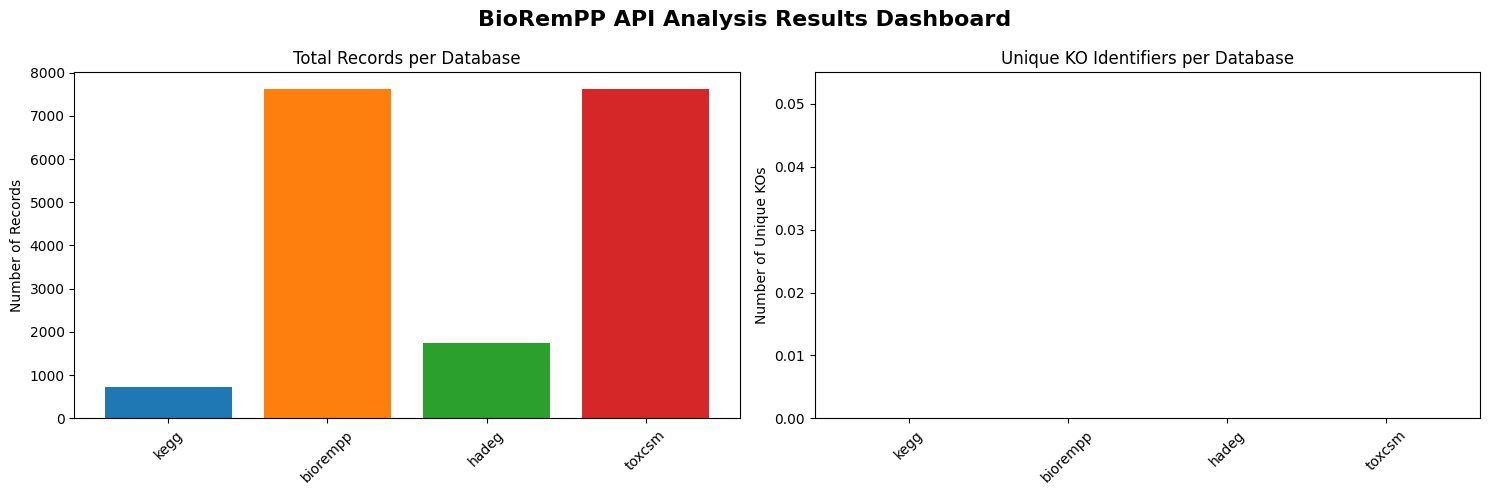

✅ Visualization dashboard generated successfully
📁 Summary statistics saved to: api_results/API_Analysis_Summary.csv


In [29]:
# Results Visualization
print("📈 Results Visualization")
print("=" * 30)

if analysis_summary:
    # Create visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Apenas duas colunas agora
    fig.suptitle('BioRemPP API Analysis Results Dashboard', fontsize=16, fontweight='bold')

    # 1. Database Record Counts
    databases = list(analysis_summary.keys())
    record_counts = [analysis_summary[db]['total_records'] for db in databases]

    axes[0].bar(databases, record_counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(databases)])
    axes[0].set_title('Total Records per Database')
    axes[0].set_ylabel('Number of Records')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].set_ylim(bottom=0)  # Garante que o eixo Y comece de zero

    # 2. Unique KO Identifiers
    ko_counts = [analysis_summary[db]['unique_ko_ids'] for db in databases]

    axes[1].bar(databases, ko_counts, color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'][:len(databases)])
    axes[1].set_title('Unique KO Identifiers per Database')
    axes[1].set_ylabel('Number of Unique KOs')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].set_ylim(bottom=0)  # Aqui está o ajuste solicitado

    plt.tight_layout()
    plt.show()

    print("✅ Visualization dashboard generated successfully")

    # Save summary statistics
    summary_stats = pd.DataFrame({
        'Database': databases,
        'Total_Records': record_counts,
        'Unique_KO_IDs': ko_counts,
    })

    summary_path = PROCESSING_CONFIG['output_dir'] / "API_Analysis_Summary.csv"
    summary_stats.to_csv(summary_path, index=False)
    print(f"📁 Summary statistics saved to: {summary_path}")

else:
    print("⚠️ No data available for visualization")


---

## 7. Advanced API Features and Error Handling

### 7.1 Comprehensive Error Handling

The Python API provides enhanced error handling capabilities for robust bioinformatics workflows.

In [30]:
# Advanced Error Handling and Validation
print("🛡️ Advanced Error Handling and Validation")
print("=" * 50)

def robust_pipeline_execution(pipeline_func, database_name: str, input_path: str, **kwargs):
    """
    Execute pipeline with comprehensive error handling and validation.
    """
    try:
        print(f"🔄 Executing {database_name} pipeline...")

        # Validate input file
        if not Path(input_path).exists():
            raise FileNotFoundError(f"Input file not found: {input_path}")

        # Execute pipeline with timeout handling
        result = pipeline_func(input_path=input_path, **kwargs)

        # Validate results
        if not result or 'output_path' not in result:
            raise ValueError(f"Invalid result structure from {database_name} pipeline")

        if not Path(result['output_path']).exists():
            raise FileNotFoundError(f"Output file not created: {result['output_path']}")

        # Verify output content
        output_df = pd.read_csv(result['output_path'], sep=kwargs.get('sep', ';'))
        if output_df.empty:
            raise ValueError(f"Empty output from {database_name} pipeline")

        result['validation_status'] = 'success'
        result['output_records'] = len(output_df)

        print(f"   ✅ {database_name}: {result['output_records']} records processed")
        return result

    except FileNotFoundError as e:
        error_result = {'error_type': 'FileNotFoundError', 'error_message': str(e), 'validation_status': 'failed'}
        print(f"   📁 {database_name}: File error - {e}")
        return error_result

    except ValueError as e:
        error_result = {'error_type': 'ValueError', 'error_message': str(e), 'validation_status': 'failed'}
        print(f"   📊 {database_name}: Data error - {e}")
        return error_result

    except Exception as e:
        error_result = {'error_type': type(e).__name__, 'error_message': str(e), 'validation_status': 'failed'}
        print(f"   ❌ {database_name}: Unexpected error - {e}")
        return error_result

# Demonstrate robust pipeline execution
pipelines = [
    (run_biorempp_processing_pipeline, "BioRemPP"),
    (run_kegg_processing_pipeline, "KEGG"),
    (run_hadeg_processing_pipeline, "HADEG"),
    (run_toxcsm_processing_pipeline, "ToxCSM")
]

robust_results = {}
for pipeline_func, db_name in pipelines:
    robust_results[db_name.lower()] = robust_pipeline_execution(
        pipeline_func=pipeline_func,
        database_name=db_name,
        input_path=str(sample_data_path),
        output_dir=str(PROCESSING_CONFIG['output_dir']),
        output_filename=f"Robust_{db_name}_Results.txt",
        sep=";",
        add_timestamp=True,
        optimize_types=True
    )

# Summary of robust execution
successful_pipelines = [db for db, result in robust_results.items()
                       if result.get('validation_status') == 'success']

print(f"\n📋 Robust Execution Summary:")
print(f"   ✅ Successful: {len(successful_pipelines)}/{len(pipelines)} pipelines")
print(f"   🏆 Success rate: {len(successful_pipelines)/len(pipelines)*100:.1f}%")

🛡️ Advanced Error Handling and Validation
🔄 Executing BioRemPP pipeline...
   ✅ BioRemPP: 7613 records processed
🔄 Executing KEGG pipeline...
   ✅ KEGG: 731 records processed
🔄 Executing HADEG pipeline...
   ✅ HADEG: 1737 records processed
🔄 Executing ToxCSM pipeline...
   ✅ ToxCSM: 7624 records processed

📋 Robust Execution Summary:
   ✅ Successful: 4/4 pipelines
   🏆 Success rate: 100.0%


### 7.2 Performance Monitoring and Optimization

The API provides built-in performance monitoring capabilities for optimization and resource management.

In [31]:
# Performance Monitoring and Optimization Analysis
print("Performance Monitoring and Optimization")
print("=" * 50)

import time
import psutil
import os

def monitor_performance(func, *args, **kwargs):
    """Monitor memory and CPU usage during pipeline execution."""

    # Get initial system metrics
    process = psutil.Process(os.getpid())
    initial_memory = process.memory_info().rss / 1024 / 1024  # MB
    initial_cpu_percent = process.cpu_percent()

    start_time = time.time()

    try:
        # Execute function
        result = func(*args, **kwargs)

        # Get final metrics
        execution_time = time.time() - start_time
        final_memory = process.memory_info().rss / 1024 / 1024  # MB
        memory_delta = final_memory - initial_memory

        # Add performance metrics to result
        if isinstance(result, dict):
            result.update({
                'performance_metrics': {
                    'execution_time': execution_time,
                    'initial_memory_mb': initial_memory,
                    'final_memory_mb': final_memory,
                    'memory_delta_mb': memory_delta,
                    'peak_memory_used': max(initial_memory, final_memory)
                }
            })

        return result

    except Exception as e:
        execution_time = time.time() - start_time
        return {
            'error': str(e),
            'performance_metrics': {
                'execution_time': execution_time,
                'initial_memory_mb': initial_memory,
                'error_occurred': True
            }
        }

# Monitor performance of BioRemPP pipeline
print("🔍 Monitoring BioRemPP pipeline performance...")

monitored_result = monitor_performance(
    run_biorempp_processing_pipeline,
    input_path=str(sample_data_path),
    output_dir=str(PROCESSING_CONFIG['output_dir']),
    output_filename="Performance_Test_Results.txt",
    sep=";",
    optimize_types=True
)

# Display performance metrics
if 'performance_metrics' in monitored_result:
    metrics = monitored_result['performance_metrics']

    print("📊 Performance Metrics:")
    print("=" * 30)
    print(f"   ⏱️ Execution time: {metrics['execution_time']:.3f} seconds")
    print(f"   🧠 Initial memory: {metrics['initial_memory_mb']:.1f} MB")
    print(f"   🧠 Final memory: {metrics['final_memory_mb']:.1f} MB")
    print(f"   📈 Memory delta: {metrics['memory_delta_mb']:+.1f} MB")
    print(f"   🏔️ Peak memory: {metrics['peak_memory_used']:.1f} MB")

    # Performance recommendations
    if metrics['memory_delta_mb'] > 100:
        print("💡 Recommendation: Consider memory optimization for large datasets")

    if metrics['execution_time'] > 10:
        print("💡 Recommendation: Consider parallel processing for better performance")

    if 'matches' in monitored_result:
        throughput = monitored_result['matches'] / metrics['execution_time']
        print(f"🚀 Processing throughput: {throughput:.0f} matches/second")

else:
    print("❌ Performance monitoring failed")

print("\n✅ Performance analysis completed")

⚡ Performance Monitoring and Optimization
🔍 Monitoring BioRemPP pipeline performance...
📊 Performance Metrics:
   ⏱️ Execution time: 0.124 seconds
   🧠 Initial memory: 303.6 MB
   🧠 Final memory: 305.4 MB
   📈 Memory delta: +1.8 MB
   🏔️ Peak memory: 305.4 MB
🚀 Processing throughput: 61456 matches/second

✅ Performance analysis completed


---

## 8 Conclusion and Best Practices

### 8.1 Benefits of using the **API** in research workflows

* **Direct DataFrame access** enabling flexible manipulation and integration in pipelines.
* **Improved error diagnostics** with rich exceptions suitable for automation.
* **Performance and resource monitoring** to guide optimization decisions.
* **Natural integration** with the scientific ecosystem (pandas, matplotlib/seaborn, stats).
* **Programmatic configuration and parameterization** for reproducibility.
* **Compatibility with advanced statistical analysis** (testing, modeling, inference).
* **Custom visualizations and reporting** tailored to study objectives.
* **Batch and automation support** for multi-sample, large-scale runs.

> In this notebook, results were obtained **via API calls**, with explicit control of inputs, parameters, and outputs, keeping the analysis **reproducible and scriptable**.

### 8.2 Best practices for API‑based routines

* **Comprehensive error handling** on all pipeline calls (informative try/except).
* **Validate inputs** (schema/columns, value ranges, missing data) before processing.
* **Monitor memory** for large datasets; prefer *chunking/streaming* when applicable.
* Use **`optimize_types=True`** (when available) for dtype downcasting and memory efficiency.
* **Persist intermediate results** to support recovery and partial re‑runs.
* **Enable structured logging** (levels/handlers) for production visibility and debugging.
* **Apply batch processing** to standardize multi-sample executions and improve throughput.
* **Schedule regular backups** of results and metadata for provenance and compliance.

### 8.3 Capabilities demonstrated here *(via API)*

* **Database** information and analyses.
* **Input validation** and **error handling** aligned with notebook automation.
* **Lightweight performance monitoring** during execution.
* **Integration with statistical tooling** for post‑processing.
* **Visualization** with matplotlib/seaborn.
* **Pandas interoperability** for end‑to‑end pipelines.
* **Parameterization and custom configuration** directly from the notebook.

### 8.4 Project resources (reference)

* **GitHub repository**: [https://github.com/DougFelipe/biorempp](https://github.com/DougFelipe/biorempp)
* **Documentation**: [https://biorempp.readthedocs.io/](https://biorempp.readthedocs.io/)
* **API reference**: functions and classes for programmatic use
* **Issue tracking**: bug reports and feature requests welcome
* **Testing**: test suite supporting reliability and contributions



---

**Acknowledgments** — The API‑centric approach benefits from community feedback and welcomes contributions that enhance reliability, interoperability, and scientific rigor.
